# <p style="background-color:#F7DC16; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#1D3C85; font-size:160%; text-align:center; border-radius:10px; padding:12px;">ANALISE EXPLORATÓRIA E SEGMENTAÇÃO DE PÚBLICO</p>

Na área de Ciência de Dados, compreender os clientes profundamente é essencial para o triunfo de qualquer empresa. Este projeto tem como foco analisar minuciosamente os dados de compras de um estabelecimento fictício. Seu principal propósito é obter percepções significativas que capacitarão o dono da loja a aprimorar seu conhecimento sobre os consumidores, ajustar as táticas de marketing e melhorar a experiência do cliente como um todo.

**Estrutura do Projeto:**

[1. **Entendimento do Problema:**](#1)
   
[2. **Primeiras Abordagens Técnicas:**](#2)

[3. **Análise Exploratória de Dados (EDA):**](#3)

[4. **Preprocessamento de Dados:**](#4)

[5. **Aplicação do Modelo K-Means:**](#5)

[6. **Interpretação e Visualização dos Resultados:**](#6)

---

# <p style="background-color:#F7DC16; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#1D3C85; font-size:160%; text-align:center; border-radius:10px; padding:12px;">ENTENDIMENTO DO PROBLEMA</p>

**Objetivos:**

1. **Precisão na Segmentação:** Desenvolver um modelo de segmentação de clientes preciso e eficaz usando o algoritmo K-Means para categorizar com precisão os clientes com base em suas características.

2. **Extração de Insights:** Descobrir insights significativos sobre o comportamento, preferências e tendências dos clientes por meio de uma análise abrangente do conjunto de dados fornecido.

3. **Aprimoramento da Estratégia de Marketing:** Fornecer recomendações práticas ao proprietário da loja para refinar estratégias de marketing, personalizar promoções e otimizar o engajamento com base nos segmentos de clientes identificados.

4. **Identificação de Perfis de Clientes:** Definir claramente perfis de clientes distintos, analisando as relações entre variáveis como idade, renda anual, pontuação de gastos, profissão, experiência de trabalho e tamanho da família.

5. **Garantia de Qualidade dos Dados:** Assegurar a integridade do conjunto de dados abordando valores ausentes ou inconsistências, garantindo uma base confiável para as análises subsequentes.

**Perguntas a Serem Respondidas:**

1. **Quais são os principais segmentos de clientes dentro do conjunto de dados e como eles podem ser caracterizados?**
   
2. **Como a idade do cliente se correlaciona com o comportamento de gastos e quais implicações isso tem para o marketing direcionado?**

3. **Existem profissões específicas ou faixas de renda que exibem padrões notáveis em pontuações de gastos?**

4. **Como a experiência de trabalho impacta nos gastos do cliente e essa informação pode ser aproveitada para abordagens de marketing personalizadas?**

5. **De que maneiras o tamanho da família pode ser vinculado a variações na renda anual e nos hábitos de gastos?**

6. **Quais insights práticos podem ser derivados para aprimorar a experiência geral do cliente e a lealdade?**

7. **Como os segmentos de clientes identificados podem informar campanhas de marketing e promoções futuras para máxima eficácia?**

Ao abordar esses objetivos e perguntas, o projeto visa não apenas descobrir padrões no comportamento do cliente, mas também fornecer recomendações estratégicas para o proprietário da loja otimizar sua abordagem de negócios.

# <p style="background-color:#F7DC16; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#1D3C85; font-size:160%; text-align:center; border-radius:10px; padding:12px;">PRIMEIRAS ABORDAGENS TÉCNICAS</p>

### PACOTES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### CONFIGURAÇÕES DE DISPLAY

In [2]:
# Configurar opções de exibição
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### FUNÇÃO: ANÁLISE DESCRITIVA 

In [3]:
def analise_descritiva(numerical_df):
    """
    Realiza uma análise descritiva básica em um DataFrame contendo dados numéricos.

    Parâmetros:
        numerical_df (pandas.DataFrame): DataFrame contendo apenas dados numéricos.
        
    Retorna:
        pandas.DataFrame: Um DataFrame com as seguintes estatísticas descritivas para cada coluna:
            - Atributos: Nomes das colunas do DataFrame de entrada.
            - Media: Média dos valores em cada coluna.
            - Mediana: Mediana dos valores em cada coluna.
            - DesvioPadrao: Desvio padrão dos valores em cada coluna.
            - Min: Valor mínimo em cada coluna.
            - Q1: Primeiro quartil em cada coluna.
            - P10: Décimo percentil em cada coluna.
            - P90: Nonagésimo percentil em cada coluna.
            - Q3: Terceiro quartil em cada coluna.
            - Max: Valor máximo em cada coluna.
            - Range: Amplitude dos valores em cada coluna (diferença entre máximo e mínimo).
            - Assimetria: Medida de assimetria dos valores em cada coluna.
            - Curtose: Medida de curtose dos valores em cada coluna.
    """
    
    ct1 = pd.DataFrame(numerical_df.apply(np.mean)).T
    ct2 = pd.DataFrame(numerical_df.apply(np.median)).T
    ct3 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.25))).T  # Q1
    ct4 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.75))).T  # Q3
    ct5 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.10))).T  # P10
    ct6 = pd.DataFrame(numerical_df.apply(lambda x: x.quantile(0.90))).T  # P90

    d1 = pd.DataFrame(numerical_df.apply(np.std)).T
    d2 = pd.DataFrame(numerical_df.apply(min)).T
    d3 = pd.DataFrame(numerical_df.apply(max)).T
    d4 = pd.DataFrame(numerical_df.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(numerical_df.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(numerical_df.apply(lambda x: x.kurtosis())).T

    m = pd.concat([ct1, ct2, ct3, ct4, ct5, ct6, d1, d2, d3, d4, d5, d6]).T.reset_index()
    m.columns = ["Atributos", "Media", "Mediana", "Q1", "Q3", "P10", "P90", "DesvioPadrao", "Min", "Max", "Range", "Assimetria", "Curtose"]

    return m

In [4]:
# Definindo tipos na mão, para consumir menos memória
df = pd.read_csv('Customers.csv', dtype={
    'CustomerID':np.dtype('int32'),
    'Gender':'category',
    'Age':np.dtype('int32'),
    'Profession':'category',
    'Work Experience': np.dtype('int32'),
    'Family Size': np.dtype('int32')
})

df.info()
print('\n')
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              2000 non-null   int32   
 1   Gender                  2000 non-null   category
 2   Age                     2000 non-null   int32   
 3   Annual Income ($)       2000 non-null   int64   
 4   Spending Score (1-100)  2000 non-null   int64   
 5   Profession              1965 non-null   category
 6   Work Experience         2000 non-null   int32   
 7   Family Size             2000 non-null   int32   
dtypes: category(2), int32(4), int64(2)
memory usage: 67.0 KB




,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
# Deixando o nome das colunas em lowercase e eliminando caractéres especiais
df.columns = [col.lower() for col in df.columns]

df.columns = ['customerid', 'genero', 'idade', 'renda_anual',
       'score_de_gasto', 'profissao', 'anos_de_experiencia_profissional',
       'tamanho_da_familia']

In [6]:
# Verificando percentual de valores nulos por coluna
df.isna().sum() / len(df) * 100

customerid                          0.00
genero                              0.00
idade                               0.00
renda_anual                         0.00
score_de_gasto                      0.00
profissao                           1.75
anos_de_experiencia_profissional    0.00
tamanho_da_familia                  0.00
dtype: float64

#### Aqui estão alguns insights baseados nas informações fornecidas sobre o conjunto de dados:

1. **Valores Ausentes:**
   - A coluna "profissao" tem valores ausentes (NaN), conforme indicado pela diferença nas contagens de não nulos entre as colunas.

2. **Recursos Numéricos:**
   - Existem seis variáveis numéricas: customerid, idade, renda_anual, score_de_gasto, anos_de_experiencia_profissional e tamanho_da_familia.
   - O "score_de_gastos" parece estar em uma escala de 1 a 100.

3. **Recursos Categóricos:**
   - Existem duas variáveis categóricas: Gênero e Profissão.

4. **Tamanho dos Dados:**
   - O conjunto de dados compreende 2000 entradas (linhas) e 8 colunas.

### Considerando o volume ínfimo de dados nulos, vamos remover essas linhas para preservar a consistência do dataset

In [7]:
df = df.dropna()
print("O número total de entradas, após a remoção dos valores nulos é:", len(df))

O número total de entradas, após a remoção dos valores nulos é: 1965


# <p style="background-color:#F7DC16; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#1D3C85; font-size:160%; text-align:center; border-radius:10px; padding:12px;">ANÁLISE EXPLORATÓRIA (EDA)</p>

In [8]:
num_vars = df.drop("customerid",axis=1).select_dtypes(include=['int32', 'int64'])

analise_descritiva(num_vars)

,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,idade,48.894656,48.0,25.0,73.0,11.0,89.0,28.407658,0.0,99.0,99.0,0.053526,-1.168081
1,renda_anual,110616.009669,109759.0,74350.0,149095.0,54173.0,173045.4,45822.196151,0.0,189974.0,189974.0,-0.114681,-0.846035
2,score_de_gasto,51.078880,50.0,28.0,75.0,12.0,91.0,27.970056,0.0,100.0,100.0,0.000489,-1.101219
3,anos_de_experiencia_profissional,4.092621,3.0,1.0,7.0,0.0,9.0,3.925460,0.0,17.0,17.0,0.692547,-0.452150
4,tamanho_da_familia,3.757252,4.0,2.0,5.0,1.0,7.0,1.967834,1.0,9.0,8.0,0.207621,-1.159374


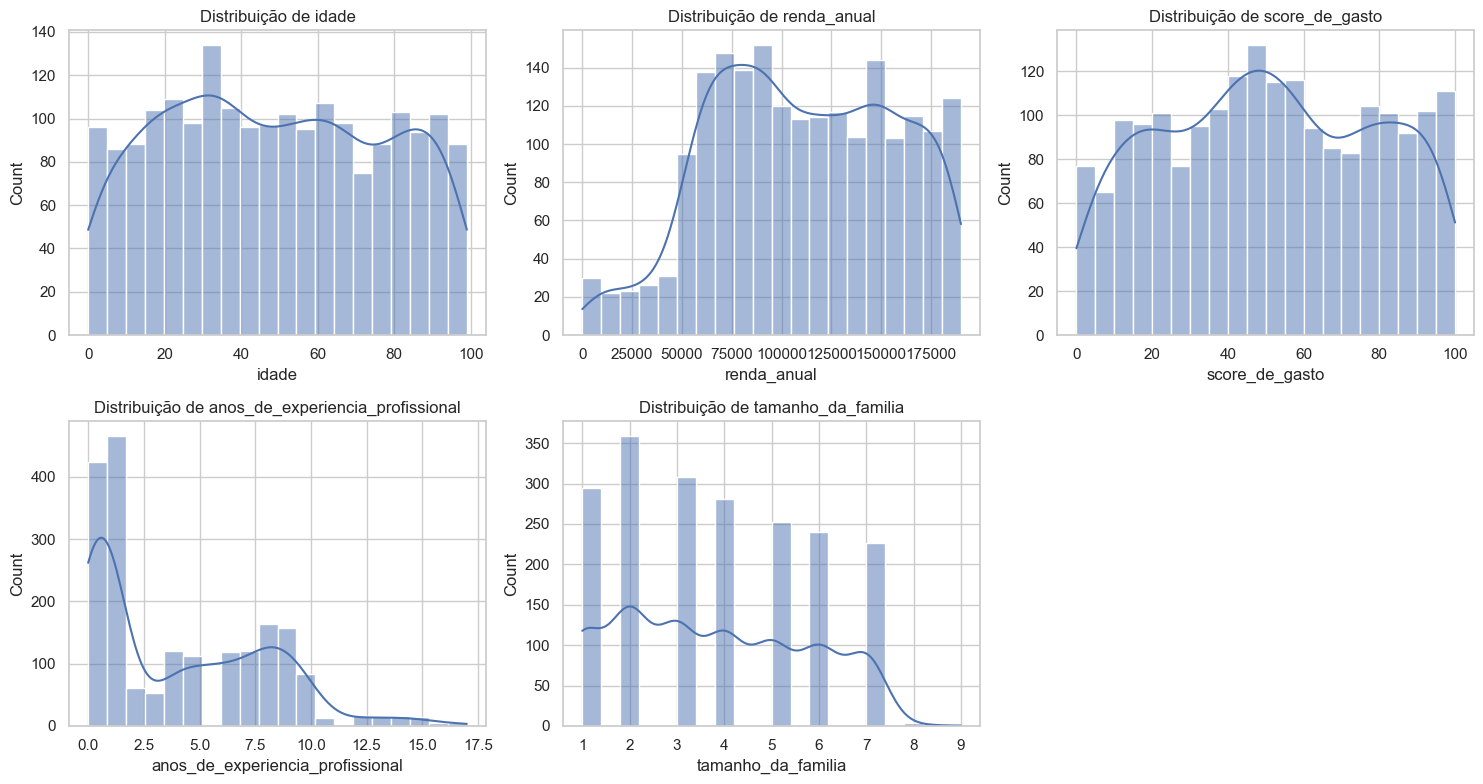

In [9]:
# Setando o estilo do seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_vars.columns, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(num_vars[col], bins=20, kde=True)
    plt.title(f'Distribuição de {col}')

plt.tight_layout()
plt.show()

**Percepções da Análise Exploratória de Dados (EDA):**

Conforme observado nos histogramas acima, várias percepções-chave emergem da distribuição das características numéricas no conjunto de dados.

1. **Distribuição da Idade:**
   - Embora a distribuição de idade atinja um pico entre 22 e 40 anos, a presença de clientes além dessa faixa etária destaca uma ampla diversidade de idades. Essa diversidade pode influenciar as preferências de produtos, escolhas de estilo de vida e preferências de engajamento, necessitando de uma abordagem flexível nos esforços de marketing.

2. **Distribuição da Renda Anual:**
   - Enquanto a maioria dos clientes ganha em torno de $70.000 anualmente, é crucial notar a presença de variabilidade nos níveis de renda. Essa diversidade pode significar o potencial para estratégias de marketing direcionadas, atendendo a diferentes faixas de renda.

3. **Distribuição da Pontuação de Gastos:**
   - A concentração das pontuações de gastos em torno de 50 sugere um comportamento de gasto equilibrado entre os clientes. No entanto, identificar agrupamentos com padrões de gastos distintos será crucial para adaptar atividades promocionais e programas de fidelidade a diferentes segmentos de clientes.

4. **Distribuição da Experiência de Trabalho:**
   - A prevalência de clientes com aproximadamente 1 ano de experiência de trabalho é notável. Compreender os comportamentos e preferências desse grupo pode revelar oportunidades de engajamento, mentoria e promoções direcionadas que ressoem com indivíduos nos estágios iniciais de suas jornadas profissionais.

Essas percepções servem como um entendimento fundamental das características demográficas e financeiras da base de clientes. Análises mais profundas e a formação de clusters ajudarão a revelar padrões mais profundos e segmentação dentro dessas demografias, contribuindo para estratégias de negócios mais direcionadas e eficazes.


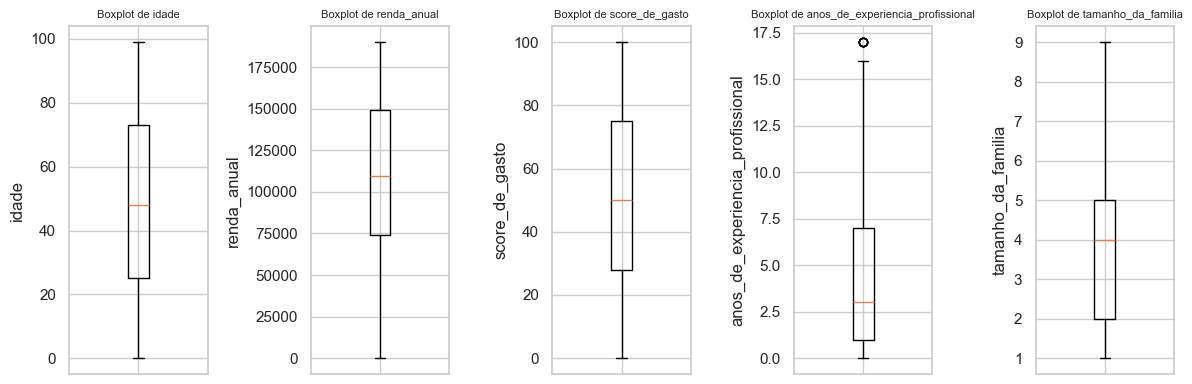

In [10]:
# Define o número de linhas e colunas necessárias para o subplot
num_cols = 5
num_rows = 1

# Cria o grid de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4))

# Loop para plotar os boxplots de cada variável numérica em um subplot
for i, col in enumerate(num_vars.columns):
    ax = axes[i]
    ax.boxplot(num_vars[col])
    ax.set_title(f'Boxplot de {col}', fontsize=8)
    ax.set_ylabel(col)
    ax.set_xticklabels([])  # Remove os números do eixo x


# Ajusta o layout para que não haja sobreposição de títulos
plt.tight_layout()

# Exibe o gráfico com todos os subplots
plt.show()


**Embora as distribuições sejam bem espaçadas, praticamente não há outliers em nosso conjunto de dados** 

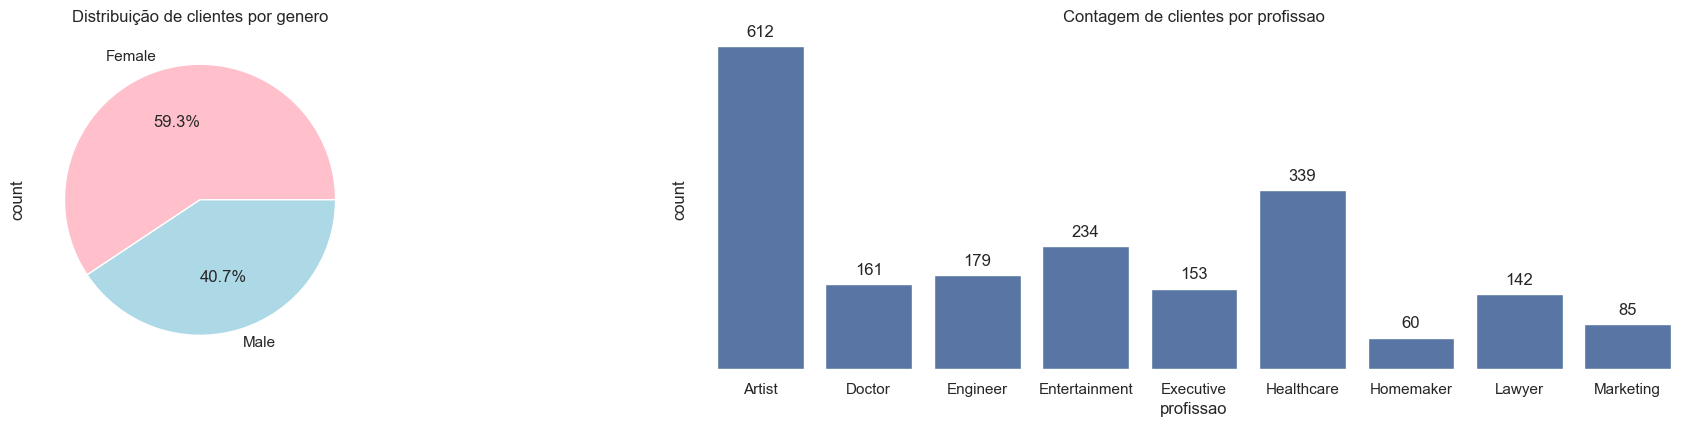

In [25]:
cat_vars = df.select_dtypes(include="category")
# Determinando o número de linhas e colunas para os subplots
plt.figure(figsize=(30, num_rows * 4))

# Cores para o gráfico de pizza
colors = ['pink', 'lightblue']

# Loop para criar um countplot ou um gráfico de pizza para cada variável categórica
for i, col in enumerate(cat_vars.columns):
    plt.subplot(num_rows, num_cols, i+1)
    
    if col == 'genero':
        gender_series = cat_vars[col].value_counts()
        gender_series.plot(kind="pie", colors=colors, autopct='%1.1f%%')
        plt.title(f'Distribuição de clientes por {col}')
        
    else:
        ax = sns.countplot(x=col, data=cat_vars)
        plt.title(f'Contagem de clientes por {col}')

        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        # Remover poluições visuais
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.grid(False)
        ax.set_yticklabels('')

plt.tight_layout()
plt.show()

**Percepções sobre Gênero e Profissão: Entendendo a Demografia dos Clientes**

Ao examinar as visualizações de "Distribuição por Gênero" e "Contagem de Clientes por Profissão", insights importantes emergem, lançando luz sobre as principais demografias dentro da base de clientes.

1. **Distribuição por Gênero:**
   - A maioria dos clientes no conjunto de dados é do sexo feminino. Essa predominância de gênero indica uma oportunidade para estratégias de marketing direcionadas, adaptadas às preferências e necessidades do público feminino.

2. **Distribuição por Profissão:**
   - As duas profissões mais prevalentes entre os clientes são artistas e profissionais da área da saúde. Esse alinhamento sugere uma presença significativa de indivíduos com ocupações criativas e relacionadas à saúde.

**Considerações Estratégicas:**
   - **Marketing Direcionado para Clientes Femininas:**
     - Com uma maior representação de clientes do sexo feminino, as iniciativas de marketing podem ser refinadas para ressoar com suas preferências. Personalizar promoções, produtos e serviços para atender aos interesses das clientes femininas pode aumentar o engajamento.

   - **Engajamento Especializado para Artistas e Profissionais da Saúde:**
     - Reconhecendo a prevalência de artistas e profissionais da saúde, a empresa pode explorar estratégias de engajamento especializadas. Isso pode envolver ofertas personalizadas, eventos exclusivos ou programas de fidelidade desenhados para atrair os interesses e necessidades de indivíduos nestas profissões.

**Ações sugeridas:**
   - Realizar pesquisas mais aprofundadas ou sessões de feedback para entender as preferências e expectativas específicas das clientes femininas.
   - Explorar oportunidades de colaboração ou parcerias com artistas e profissionais da saúde para aumentar o engajamento da marca dentro desses segmentos.

In [12]:
df.columns

Index(['customerid', 'genero', 'idade', 'renda_anual', 'score_de_gasto',
       'profissao', 'anos_de_experiencia_profissional', 'tamanho_da_familia'],
      dtype='object')

In [13]:
profession_groupped_df = (
    df.groupby('profissao', observed=False)
    .agg(
        {
            "customerid":"nunique",   
            "idade":"mean",
            "renda_anual":"mean",
            "score_de_gasto": "mean",
            "anos_de_experiencia_profissional": "mean",
            "tamanho_da_familia": "mean"
        }
    ).rename(columns={"customerid":"qtd_cliente"})
)

profession_groupped_df

,qtd_cliente,idade,renda_anual,score_de_gasto,anos_de_experiencia_profissional,tamanho_da_familia
profissao,,,,,,
Artist,612,49.004902,108776.580065,52.678105,4.215686,3.653595
Doctor,161,46.621118,111573.217391,51.900621,4.304348,3.670807
Engineer,179,55.094972,111161.240223,48.966480,3.955307,3.581006
Entertainment,234,51.162393,110650.333333,52.940171,3.500000,3.888889
Executive,153,46.601307,113770.130719,49.901961,4.248366,3.967320
Healthcare,339,47.843658,112574.041298,50.516224,4.002950,3.905605
Homemaker,60,45.366667,108758.616667,46.383333,6.133333,4.050000
Lawyer,142,47.753521,110995.838028,48.859155,3.528169,3.619718
Marketing,85,45.823529,107994.211765,48.717647,4.305882,3.729412


O plotly não renderiza no github, caso tenha interesse em ver o gráfico abaixo, procure o meu repositório em https://nbviewer.org/ <br>

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Número de linhas e colunas para os subplots
num_rows = 2
num_cols = 3

# Criar figura com um subplot para cada coluna
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=profession_groupped_df.columns)

# Adicionar um barplot para cada coluna do DataFrame
for i, column in enumerate(profession_groupped_df.columns, start=1):
    fig.add_trace(
        go.Bar(x=profession_groupped_df.index, y=profession_groupped_df[column], name=column),
        row=(i-1)//num_cols + 1,  # Calculando a linha correta
        col=(i-1)%num_cols + 1    # Calculando a coluna correta
    )

# Atualizar layout
fig.update_layout(height=600, width=1200, title_text="Métricas por Profissão", showlegend=False)
fig.show()


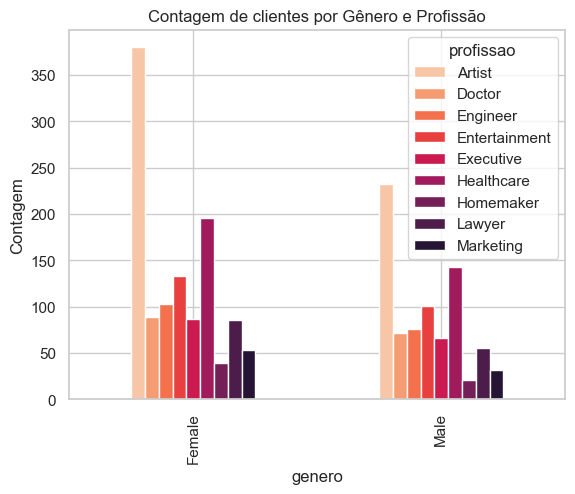

In [15]:
cross_tab = pd.crosstab(df['genero'], df['profissao'])

import seaborn as sns

# Escolhendo uma paleta de cores do Seaborn
palette = sns.color_palette("rocket_r", len(cross_tab.columns))

# Gráfico de barras com a paleta do Seaborn
cross_tab.plot(kind='bar', stacked=False, color=palette)
plt.title("Contagem de clientes por Gênero e Profissão")
plt.ylabel("Contagem")
plt.show()


# <p style="background-color:#F7DC16; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#1D3C85; font-size:160%; text-align:center; border-radius:10px; padding:12px;">PRÉ-PROCESSAMENTO DE DADOS</p>

In [16]:
# Fazendo uma cópia do DataFrame
encoded_data = df.copy()

# Inicializando o Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder a cada coluna categórica
for var in cat_vars.columns:
    encoded_data[var] = label_encoder.fit_transform(df[var].astype(str))

# Observando o resultado
encoded_data.head()


,customerid,genero,idade,renda_anual,score_de_gasto,profissao,anos_de_experiencia_profissional,tamanho_da_familia
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [17]:
# Outra cópia
normalized_data = encoded_data.copy()

# Inicializa o normalizador
# scaler = MinMaxScaler()

# Normaliza as variáveis numéricas relevantes
# normalized_data[num_vars.columns] = scaler.fit_transform(encoded_data[num_vars.columns])

# Removendo coluna de identificação do cliente, irrelevante para este processo
normalized_data = normalized_data.drop('customerid', axis=1)

# Display the modified DataFrame
normalized_data.head()

,genero,idade,renda_anual,score_de_gasto,profissao,anos_de_experiencia_profissional,tamanho_da_familia
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


`Optei por não normalizar as variáveis, pois a ação influenciava negativamente na formação dos Clusters`

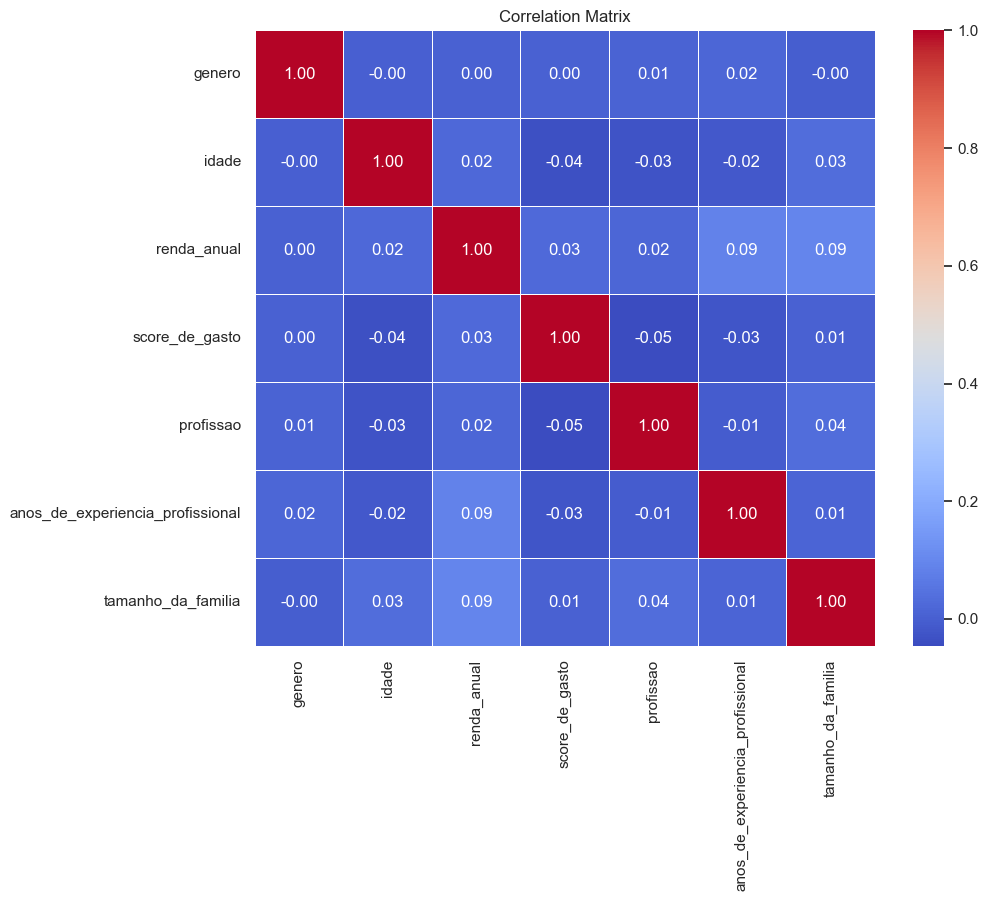

In [18]:
correlation_matrix = normalized_data.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# <p style="background-color:#F7DC16; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#1D3C85; font-size:160%; text-align:center; border-radius:10px; padding:12px;">APLICAÇÃO DO MODELO K-MEANS</p>

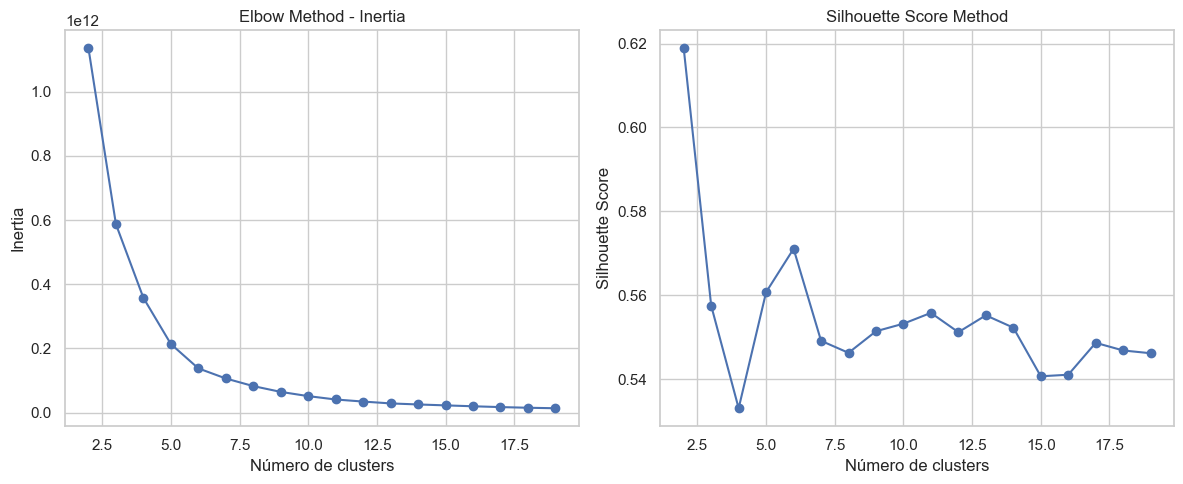

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = normalized_data.values

# Tentando diferentes números de clusters
cluster_range = range(2, 20)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    # Fit K-Means clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=30)
    kmeans.fit(X)
    
    # Calculando inertia
    inertia_values.append(kmeans.inertia_)
    
    # Calculando silhouette score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))

# Plotting Inertia
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


No Método do Cotovelo, procure pelo ponto de "cotovelo" onde a inércia começa a diminuir a uma taxa mais lenta. No Método do Índice de Silhueta, busque pela pontuação de silhueta mais alta, indicando clusters bem definidos.

In [20]:
# Escolhendo o número ótimo de clusters
optimal_num_clusters = 5

# Fit K-Means clustering model com o número ótimo de clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=30)
normalized_data['cluster'] = kmeans_optimal.fit_predict(X)

normalized_data.head()


,genero,idade,renda_anual,score_de_gasto,profissao,anos_de_experiencia_profissional,tamanho_da_familia,cluster
0,1,19,15000,39,5,1,4,4
1,1,21,35000,81,2,3,3,4
2,0,20,86000,6,2,1,1,2
3,0,23,59000,77,7,0,2,0
4,0,31,38000,40,3,2,6,4



# <p style="background-color:#F7DC16; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#1D3C85; font-size:160%; text-align:center; border-radius:10px; padding:12px;">INTERPRETAÇÃO E VISUALIZAÇÃO DOS RESULTADOS</p>

C:\Users\DELL\AppData\Local\Temp\ipykernel_18888\1737622524.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




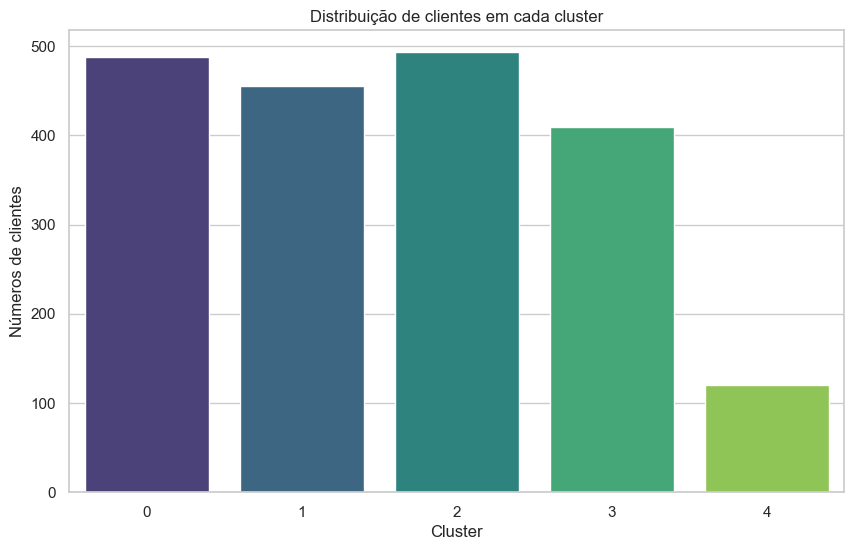

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=normalized_data, palette='viridis')
plt.title('Distribuição de clientes em cada cluster')
plt.xlabel('Cluster')
plt.ylabel('Números de clientes')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18888\300336344.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_18888\300336344.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




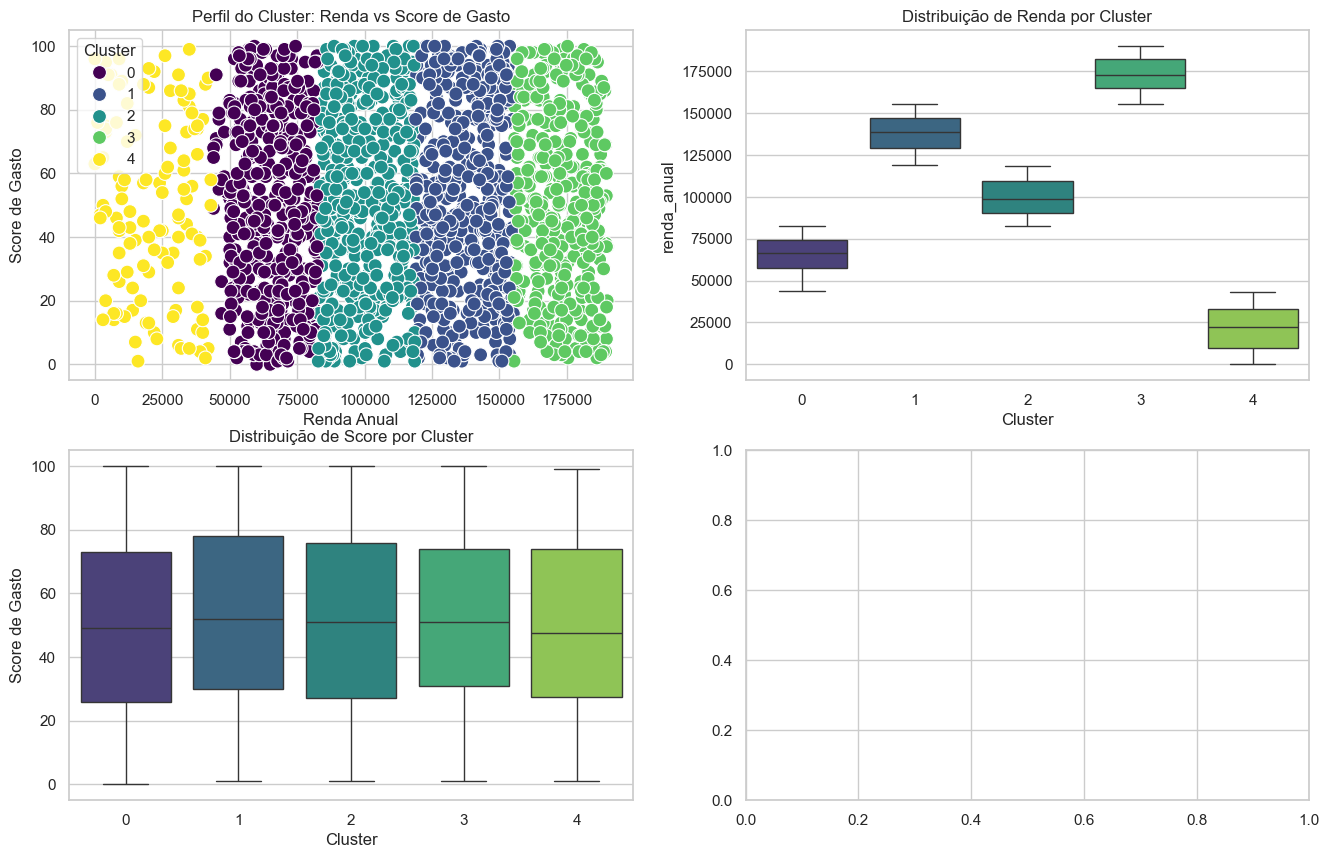

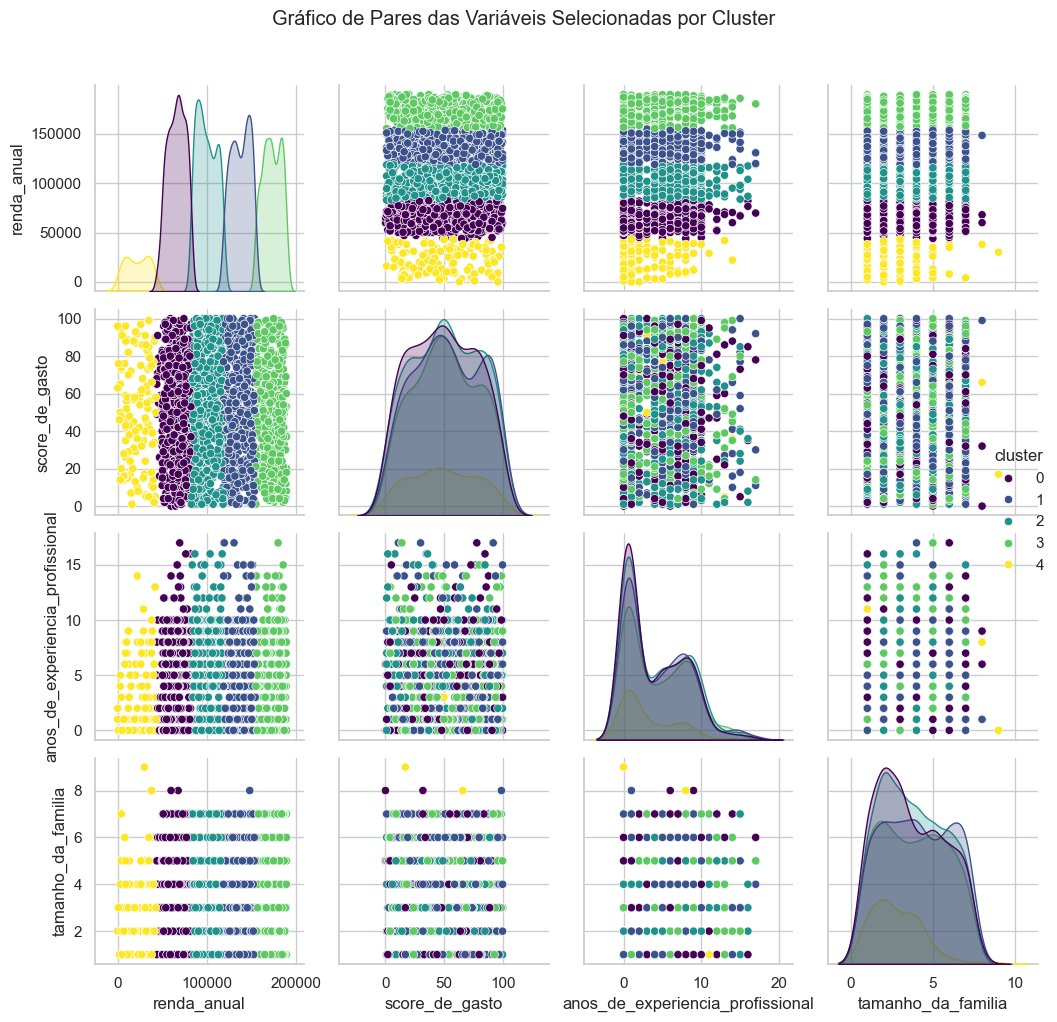

In [22]:
plt.figure(figsize=(16, 10))

# Scatter plot for renda vs gasto com clusters diferenciados por cor
plt.subplot(2, 2, 1)
sns.scatterplot(x='renda_anual', y='score_de_gasto', hue='cluster', data=normalized_data, palette='viridis', s=100)
plt.title('Perfil do Cluster: Renda vs Score de Gasto')
plt.xlabel('Renda Anual')
plt.ylabel('Score de Gasto')
plt.legend(title='Cluster')

# Box plot para renda anual
plt.subplot(2, 2, 2)
sns.boxplot(x='cluster', y='renda_anual', data=normalized_data, palette='viridis')
plt.title('Distribuição de Renda por Cluster')
plt.xlabel('Cluster')
plt.ylabel('renda_anual')

# Box plot para score
plt.subplot(2, 2, 3)
sns.boxplot(x='cluster', y='score_de_gasto', data=normalized_data, palette='viridis')
plt.title('Distribuição de Score por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Score de Gasto')

# Pair plot for selected variables
plt.subplot(2, 2, 4)
selected_vars = ['renda_anual', 'score_de_gasto', 'anos_de_experiencia_profissional', 'tamanho_da_familia']
sns.pairplot(normalized_data, hue='cluster', vars=selected_vars, palette='viridis')
plt.suptitle('Gráfico de Pares das Variáveis Selecionadas por Cluster', y=1.02)

plt.tight_layout()
plt.show()


Baseado na análise de clusters de clientes formados através do agrupamento K-Means, recomendações e conclusões podem ser desenhadas para guiar estratégias de negócios. Aqui está um modelo para elaborar recomendações e conclusões:

### Recomendações:

#### 1. **Campanhas de Marketing Direcionadas:**
   - Adequar campanhas de marketing às necessidades e preferências específicas de cada cluster de clientes. Desenhar promoções e publicidades que ressoem com as características de cada grupo.

#### 2. **Personalização de Produtos:**
   - Personalizar ofertas de produtos com base nas preferências identificadas em cada cluster. Introduzir variações ou novos produtos que estejam alinhados com o comportamento de gastos e interesses de diferentes segmentos de clientes.

#### 3. **Engajamento Personalizado com o Cliente:**
   - Implementar estratégias de engajamento personalizado com o cliente para cada cluster. Utilizar insights baseados em dados para aprimorar experiências do cliente, como recomendações personalizadas, ofertas exclusivas ou programas de fidelidade.

#### 4. **Otimização de Preços:**
   - Otimizar estratégias de preços com base na distribuição de renda dentro dos clusters. Considerar preços diferenciais ou descontos direcionados para atrair a capacidade de gastos de cada grupo.

#### 5. **Estratégias de Retenção de Clientes:**
   - Desenvolver estratégias de retenção de clientes que abordem as características únicas de cada cluster. Identificar fatores que contribuem para a lealdade do cliente e projetar iniciativas de retenção de acordo.

#### 6. **Oportunidades de Expansão de Mercado:**
   - Explorar oportunidades de expansão de mercado com base na distribuição geográfica dos clusters. Identificar regiões com uma maior concentração de segmentos específicos de clientes para esforços de expansão direcionados.

### Conclusões:

#### 1. **Percepções de Segmentação de Clientes:**
   - A análise de clustering K-Means revelou segmentos distintos de clientes com base em renda e comportamento de gastos. Esses segmentos fornecem informações valiosas sobre a base de clientes diversificada.

#### 2. **Características dos Clusters:**
   - Os clusters exibem diferentes níveis de renda e padrões de gastos, permitindo um entendimento matizado do comportamento do cliente. Alguns clusters podem priorizar altos gastos, enquanto outros podem focar em valor ou categorias específicas de produtos.

#### 3. **Impacto nos Negócios:**
   - Os clusters identificados têm implicações diretas para as estratégias de negócios, possibilitando um direcionamento mais preciso e alocação de recursos. Ao adaptar abordagens para cada cluster, o negócio está preparado para aumentar a satisfação do cliente e impulsionar o crescimento da receita.

#### 4. **Monitoramento e Adaptação Contínuos:**
   - As preferências e comportamentos dos clientes podem evoluir ao longo do tempo. É crucial estabelecer um sistema para monitoramento contínuo, análise e adaptação das estratégias para permanecer alinhado com as dinâmicas do cliente em mudança.

#### 5. **Vantagem Competitiva:**
   - Aproveitar os insights obtidos a partir do agrupamento de clientes oferece uma vantagem competitiva. Ao entender e atender às necessidades únicas de cada segmento, o negócio está melhor posicionado no mercado.

#### 6. **Tomada de Decisão Baseada em Dados:**
   - O sucesso de estratégias futuras depende da contínua confiança na tomada de decisão baseada em dados. Analisar regularmente dados de clientes, feedback e tendências de mercado para refinar e otimizar estratégias.

### Próximos Passos:

#### 1. **Plano de Implementação:**
   - Desenvolver um plano de implementação detalhado para executar as estratégias recomendadas. Detalhar claramente as etapas, responsabilidades e cronogramas para cada iniciativa.

#### 2. **Mecanismo de Feedback:**
   - Estabelecer um mecanismo de feedback para monitorar a eficácia das estratégias implementadas. Coletar feedback do cliente, medir indicadores-chave de desempenho e iterar com base nas percepções obtidas.

#### 3. **Colaboração Interfuncional:**
   - Incentivar a colaboração entre diferentes departamentos para garantir a execução sem falhas das estratégias. As equipes de marketing, vendas e atendimento ao cliente devem trabalhar em conjunto para oferecer uma experiência coesa ao cliente.

#### 4. **Integração de Tecnologia:**
   - Aproveitar ferramentas de tecnologia para implementação e monitoramento eficientes. Explorar sistemas de gerenciamento de relacionamento com o cliente (CRM), plataformas de análise e outras ferramentas para simplificar processos.

#### 5. **Treinamento e Conscientização:**
   - Fornecer treinamento às equipes relevantes sobre as novas estratégias e iniciativas. Garantir que os funcionários estejam bem informados e alinhados com a visão centrada no cliente da empresa.

Combinando as recomendações com etapas de ação concretas, o negócio pode traduzir insights do agrupamento de clientes em resultados tangíveis e sucesso sustentado.